<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/pseudospectral%20kinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral para ondas kinks


# ttpsi - colpsi + dV/dpsi = 0;  unidimensional


N = 500

L0 = 20

col = np.cos(np.arange(N)*math.pi / N)     # pontos de colocação
x = L0 * np.arctanh(col)                   # mapeamento   

xcol = (1 + np.tanh(x/L0)**2)/L0              # dcol/dx
xxcol = (2*np.tanh(x/L0)*(1+np.tanh(x/L0)**2))/L0**2   # d^2 col / dx^2


T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
xxT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])
ccolT = np.zeros([N+2,N])


T[0,] = 1
T[1,] = col

for i in (range(2,N+2)):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

colT[0,] = 0
colT[1,] = 1
xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  xT[i,] = xcol*colT[i,]                                                  # colT[i,] = dT[i,]/dcol, xcol = dcol/dx



ccolT[0,] = 0
ccolT[1,] = 0
xxT[0,] = xxcol*colT[0,] + (xcol)**2 * ccolT[0,]
xxT[1,] = xxcol*colT[0,] + (xcol)**2 * ccolT[0,]

for i in range(2, N+2):
  ccolT[i,] = 2*colT[i-1,] + 2*col*ccolT[i-1,] + 2*colT[i-1] - ccolT[i-2,]
  xxT[i,] = xxcol*colT[i,] + (xcol)**2 * ccolT[i,]                         # ccolT[i,] = d²T[i,]/dcol²


psi = T[0:N,:]   
xpsi = xT[0:N,:]
xxpsi = xxT[0:N,:]


# Condicoes iniciais

x0 = 10
u = 0.1


f_k0 = np.tanh((x + x0)/np.sqrt(1 - u**2))        # dado inicial da solução viajante do kink 

f_antik0 = - np.tanh((x - x0)/np.sqrt(1 - u**2))  # dado inicial da solução viajante do antikink 

f_colisao0 = -1 + f_k0 - f_antik0                  # dado inicial da colisão de um kink com um antikink



inv_psi = np.linalg.inv(psi)

#a0 = np.dot(f_k0, inv_psi)   

a0 = np.dot(f_colisao0, inv_psi)  # coeficientes a(0)

phi = np.dot(a0, psi)      # solução exata em t=0



# Derivada temporal de psi para t = 0

dtf_k0 = -(1-np.tanh((x+x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

dtf_antik0 = -(1-np.tanh((x-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1) 

#da0 = np.dot(dtf_k0, inv_psi)  # da(0)



#dtphi = np.dot(da0, psi)

dtf_colisao0 = -1 + dtf_k0 - dtf_antik0

da0 = np.dot(dtf_colisao0, inv_psi)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


(500, 500)

In [39]:
# Plot: Condições Iniciais
M = 300

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in (range(2,N+2)):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 



xplot0 = 0
u = 0.1

f_kplot = np.tanh((xplot + xplot0)/np.sqrt(1 - u**2))

f_antikplot =  - np.tanh((xplot - xplot0)/np.sqrt(1 - u**2))

f_coliplot0 = -1 + f_kplot - f_antikplot


a0_plot = np.dot(f_coliplot0, np.linalg.inv(psiplot))

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_kplot)

da01 = np.dot(dtf_k0, inv_psi)

dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

dtphiplot = np.dot(da01, psiplot)





LinAlgError: ignored

In [40]:
np.shape(psiplot)


(500, 300)

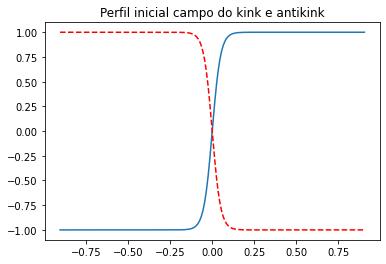

In [ ]:
plt.plot(colplot, f_kplot)
plt.plot(colplot, f_antikplot, "--r")
plt.title("Perfil inicial campo do kink e antikink")
plt.show()

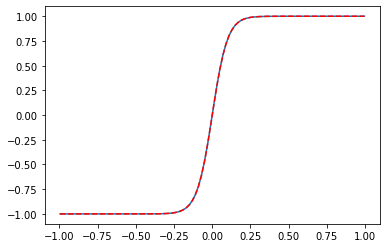

In [ ]:
plt.plot(colplot, phiplot, colplot, f_kplot, "--r")
plt.show()

In [41]:

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It + 1)

phi_set = np.zeros([It,M])


#f_k = np.tanh((x + x0 - u*t)/np.sqrt(1 - u**2))    # solução viajante do kink f_k(t)

#f_antik = - np.tanh((x - x0 + u*t)/np.sqrt(1 - u**2))  # solução viajante do antikink f_antik(t)

#f_colisao = -1 + f_k - f_antik                   # solução da colisão do kink e antikink

def dV(phi):
  return phi**3 - phi


for i in range(It):  # Runge Kutta 4th order

  phi = np.dot(a0, psi)
  dda = np.dot(a0, xxpsi) - dV(phi) 
  L1 = h*(da0)
  K1 = h*(dda)

  phi = np.dot(a0 + L1/2, psi)
  dda = np.dot(a0 + L1/2, xxpsi) - dV(phi) 
  L2 = h*(da0 + K1/2)
  K2 = h*(dda)

  phi = np.dot(a0 + L2/2, psi)
  dda = np.dot(a0 + L2/2, xxpsi) - dV(phi) 
  L3 = h*(da0 + K2/2)
  K3 = h*(dda)

  phi = np.dot(a0 + L3, psi)
  dda = np.dot(a0 + L3, xxpsi) - dV(phi) 
  L4 = h*(da0 + K3)
  K4 = h*(dda) 
  
  da0 = da0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  phi_set[i,:] = np.dot(a0, psiplot)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in add


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na